In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/Users/didi/Downloads/simsun.ttc')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import linear_model
from xgboost import XGBClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix

In [46]:
df=pd.read_csv('/Users/didi/Downloads/enjoy_model_0119.csv',encoding = 'gbk')
df.head()

,passenger_id,gulf_compete_call,enjoy_compete_call,fast_compete_call,total_compete_call,total_product_lines,peak_call,long_dis_call,short_dis_call,gulf_single_call,enjoy_single_call,total_cancel_before_answer,gulf_answer,enjoy_answer,fast_answer,total_answer,gulf_single_answer,enjoy_single_answer,gulf_other_answer,enjoy_other_answer,enjoy_cancel_after_answer_pas,enjoy_cancel_after_answer_dri,gulf_finish,enjoy_finish,total_finish,gulf_single_f,enjoy_single_f,avg_dri_score,min_dri_score,max_dri_score,avg_c_rate,max_c_rate,min_c_rate,cpo_cnt,yzy,avg_pickup_dur,min_pickup_dur,max_pickup_dur,avg_pickup_dis,min_pickup_dis,max_pickup_dis,subsidy_sensitive,resident_city_level,level_id,has_car_probability,consume_ability,p_gender,pct_commute,pct_business_trip,pct_entertainment,pct_large_hub,enjoy_compete_call_12,total_compete_call_12,enjoy_finish_12,total_finish_12,is_finish_retention,is_call_retention,bubble_cnt,enjoy_expose_cnt,enjoy_default_cnt,enjoy_call_keep_cnt,enjoy_call_active_cnt,gulf_expose_cnt,gulf_default_cnt,gulf_call_keep_cnt,gulf_call_active_cnt,fast_expose_cnt,fast_default_cnt,fast_call_keep_cnt,fast_call_active_cnt
0,17592494183302,0,2,7,7,18,3,0,5,0,0,0,0,0,6,7,0,0,0,2,0,0,0,0,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,二线城市,1.0,NaN,0.276749,1.0,0.027027,0.081081,0.324324,0.000000,0.0,1.0,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17592494699327,0,1,0,5,7,0,0,0,0,0,2,0,0,2,2,0,0,0,1,0,0,0,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,二线城市,NaN,1.0,0.113500,-1.0,0.000000,0.000000,0.125000,0.000000,NaN,NaN,NaN,NaN,0,0,6.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0
2,17592495106904,0,1,7,8,11,6,4,0,0,0,2,0,0,6,6,0,0,0,0,0,0,0,0,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,二线城市,1.0,NaN,0.464618,-1.0,0.212121,0.040404,0.292929,0.070707,0.0,9.0,0.0,3.0,0,0,5.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,5.0,1.0,0.0
3,17592496520472,2,2,17,17,28,6,0,4,0,0,1,1,0,14,16,0,0,1,2,0,0,1,0,16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,二线城市,1.0,NaN,0.447023,1.0,0.382353,0.014706,0.088235,0.014706,2.0,32.0,0.0,26.0,0,1,30.0,19.0,2.0,0.0,2.0,24.0,1.0,0.0,2.0,30.0,30.0,17.0,0.0
4,17592497485425,0,8,8,8,32,4,0,7,0,0,0,0,0,3,8,0,0,0,8,0,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,二线城市,NaN,NaN,0.230780,1.0,0.000000,0.120000,0.400000,0.120000,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.columns

Index(['passenger_id', 'gulf_compete_call', 'enjoy_compete_call',
       'fast_compete_call', 'total_compete_call', 'total_product_lines',
       'peak_call', 'long_dis_call', 'short_dis_call', 'gulf_single_call',
       'enjoy_single_call', 'total_cancel_before_answer', 'gulf_answer',
       'enjoy_answer', 'fast_answer', 'total_answer', 'gulf_single_answer',
       'enjoy_single_answer', 'gulf_other_answer', 'enjoy_other_answer',
       'enjoy_cancel_after_answer_pas', 'enjoy_cancel_after_answer_dri',
       'gulf_finish', 'enjoy_finish', 'total_finish', 'gulf_single_f',
       'enjoy_single_f', 'avg_dri_score', 'min_dri_score', 'max_dri_score',
       'avg_c_rate', 'max_c_rate', 'min_c_rate', 'cpo_cnt', 'yzy',
       'avg_pickup_dur', 'min_pickup_dur', 'max_pickup_dur', 'avg_pickup_dis',
       'min_pickup_dis', 'max_pickup_dis', 'subsidy_sensitive',
       'resident_city_level', 'level_id', 'has_car_probability',
       'consume_ability', 'p_gender', 'pct_commute', 'pct_business_tr

In [48]:
df['enjoy_other_answer']=df['enjoy_other_answer'].fillna(0)

df['enjoy_call_pen']=df['enjoy_compete_call']/df['total_compete_call']
df['gulf_call_pen']=df['gulf_compete_call']/df['total_compete_call']
df['fast_call_pen']=df['fast_compete_call']/df['total_compete_call']

df['enjoy_single_call_rate']=df['enjoy_single_call']/df['enjoy_compete_call']

df['avg_pl']=df['total_product_lines']/df['total_compete_call']
df['long_dis_rate']=df['long_dis_call']/df['total_compete_call']
df['short_dis_rate']=df['short_dis_call']/df['total_compete_call']
df['peak_rate']=df['peak_call']/df['total_compete_call']

df['cancel_before_answer_rate']=df['total_cancel_before_answer']/df['total_compete_call']

df['enjoy_compete_arate']=df['enjoy_answer']/df['enjoy_compete_call']
#df['enjoy_obj_arate']=df['enjoy_answer']/(df['enjoy_compete_call']-df['enjoy_other_answer'])
df['total_arate']=df['total_answer']/df['total_compete_call']

df['enjoy_cancel_after_answer_rate']=(df['enjoy_cancel_after_answer_pas']+df['enjoy_cancel_after_answer_dri'])/df['enjoy_answer']
df['enjoy_cancel_after_answer_rate']=df['enjoy_cancel_after_answer_rate'].fillna(0)

df['enjoy_compete_frate']=df['enjoy_finish']/df['enjoy_compete_call']
df['enjoy_single_frate']=df['enjoy_single_f']/df['enjoy_compete_call']

df['enjoy_active_choose_rate']=df['enjoy_call_keep_cnt']/(df['enjoy_call_keep_cnt']+df['enjoy_call_active_cnt'])
df['enjoy_expose_rate']=df['enjoy_expose_cnt']/df['bubble_cnt']
df['enjoy_default_rate']=df['enjoy_default_cnt']/df['bubble_cnt']

df['enjoy_call_pen_dec']=df['enjoy_compete_call_12']/df['total_compete_call_12']



In [49]:
df.columns

Index(['passenger_id', 'gulf_compete_call', 'enjoy_compete_call',
       'fast_compete_call', 'total_compete_call', 'total_product_lines',
       'peak_call', 'long_dis_call', 'short_dis_call', 'gulf_single_call',
       'enjoy_single_call', 'total_cancel_before_answer', 'gulf_answer',
       'enjoy_answer', 'fast_answer', 'total_answer', 'gulf_single_answer',
       'enjoy_single_answer', 'gulf_other_answer', 'enjoy_other_answer',
       'enjoy_cancel_after_answer_pas', 'enjoy_cancel_after_answer_dri',
       'gulf_finish', 'enjoy_finish', 'total_finish', 'gulf_single_f',
       'enjoy_single_f', 'avg_dri_score', 'min_dri_score', 'max_dri_score',
       'avg_c_rate', 'max_c_rate', 'min_c_rate', 'cpo_cnt', 'yzy',
       'avg_pickup_dur', 'min_pickup_dur', 'max_pickup_dur', 'avg_pickup_dis',
       'min_pickup_dis', 'max_pickup_dis', 'subsidy_sensitive',
       'resident_city_level', 'level_id', 'has_car_probability',
       'consume_ability', 'p_gender', 'pct_commute', 'pct_business_tr

In [59]:
cat = df[['p_gender','subsidy_sensitive',
       'resident_city_level', 'level_id']]

no_cat = df[['gulf_compete_call', 'enjoy_compete_call',
        'total_compete_call', 
       'enjoy_single_call', 'total_cancel_before_answer', 
       'enjoy_cancel_after_answer_pas', 'enjoy_cancel_after_answer_dri',
       'gulf_finish', 'enjoy_finish', 'total_finish',  'avg_dri_score', 'min_dri_score', 'max_dri_score',
       'avg_c_rate', 'max_c_rate', 'min_c_rate', 'cpo_cnt', 'yzy',
       'avg_pickup_dur', 'min_pickup_dur', 'max_pickup_dur', 'avg_pickup_dis',
       'min_pickup_dis', 'max_pickup_dis', 'has_car_probability',
       'consume_ability', 'pct_commute', 'pct_business_trip',
       'pct_entertainment', 'pct_large_hub', 
       'enjoy_call_pen', 'gulf_call_pen', 'fast_call_pen',
       'enjoy_single_call_rate', 'avg_pl', 'long_dis_rate', 'short_dis_rate',
       'peak_rate', 'cancel_before_answer_rate', 'enjoy_compete_arate',
       'total_arate', 'enjoy_cancel_after_answer_rate', 'enjoy_compete_frate',
       'enjoy_single_frate',
             'enjoy_active_choose_rate', 'enjoy_expose_rate', 'enjoy_default_rate',
             'total_compete_call_12']]


cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

#组合X和Y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['is_call_retention']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)   

In [51]:
df.groupby('is_call_retention').size()

is_call_retention
0    476871
1    518129
dtype: int64

In [60]:
model = xgb.XGBClassifier(
        objective='binary:logistic', 
        learning_rate= 0.6,
        silent = 1,
       max_depth =5,
       min_child_weight=1,
       gamma=0,
       subsample=0.9,
       scale_pos_weight=1,
       n_estimators = 10
        ).fit(X_train,y_train)
pred = model.predict(X_test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

0.8043417085427136 0.8024578601935644


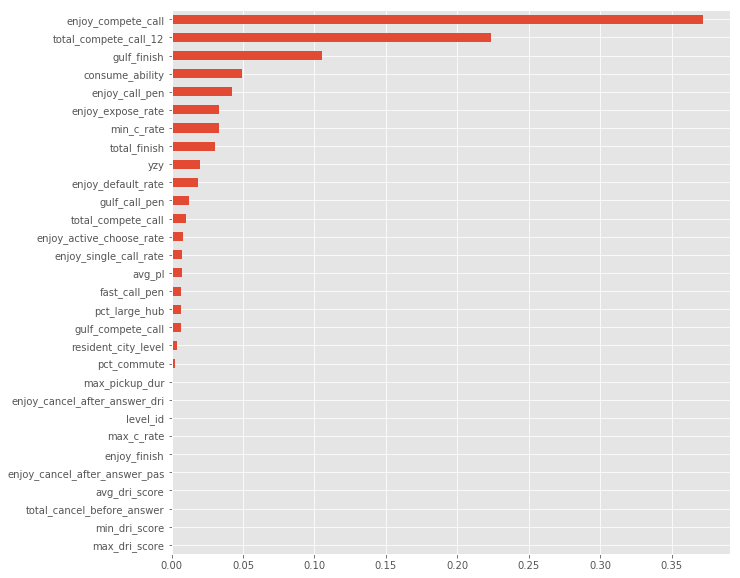

In [61]:
plt.figure(figsize=(10,10))
pd.Series(model.feature_importances_,index=X_train.columns).sort_values()[-30:].plot(kind='barh')

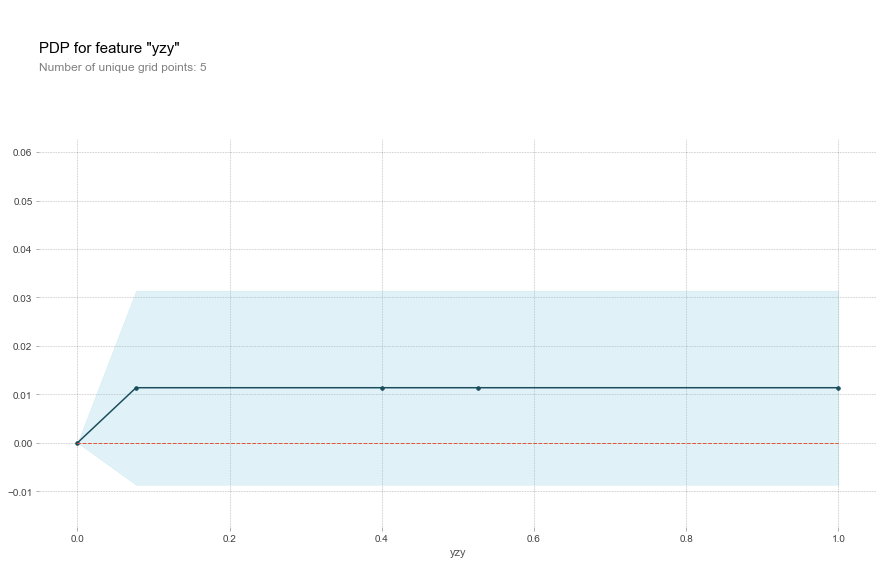

In [62]:
from pdpbox import pdp,info_plots
feature = 'yzy'
pdp_goals = pdp.pdp_isolate(model, X_train[X_train.yzy.notnull()], list(X_train.columns), feature)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

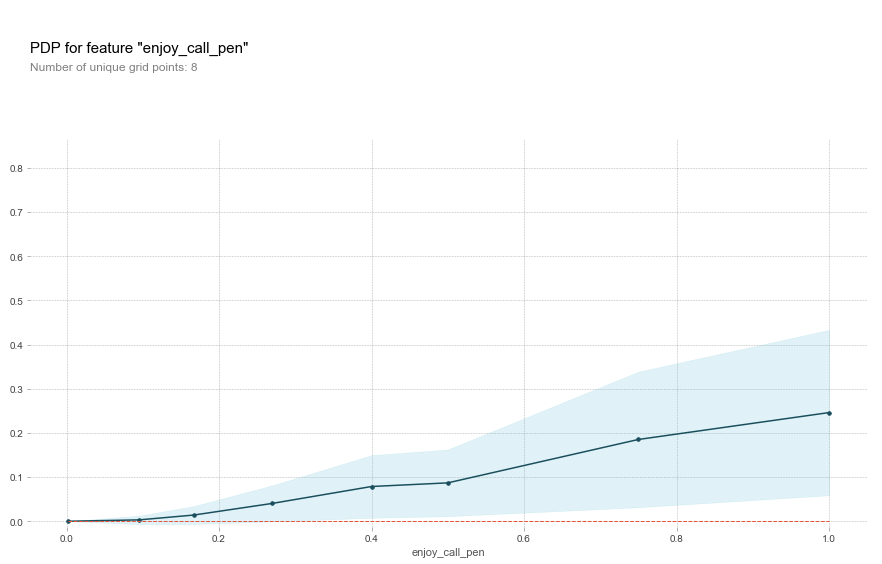

In [63]:
from pdpbox import pdp,info_plots
feature = 'enjoy_call_pen'
pdp_goals = pdp.pdp_isolate(model, X_train, list(X_train.columns), feature)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

## 分割线

In [3]:
#step1 读入数据
part1 = pd.read_csv('/Users/didi/Downloads/recall_v31.csv',encoding = 'gbk')
                  # skiprows = lambda x: x>0 and np.random.rand() > 0.01)
#part1['label'] = 1
part2 = pd.read_csv('/Users/didi/Downloads/recall_v32.csv',encoding = 'gbk')
                  # skiprows = lambda x: x>0 and np.random.rand() > 0.01)
#part2=part2.drop(['rk'],axis=1)
#part2['label'] = 0
part2.columns = part1.columns
df = pd.concat([part1,part2])
df=df.drop(['order_id'],axis=1)
df=df.drop_duplicates()

df['over_charge_dur_rate']=df['over_dur_cnt']/df['last28_finish']
df['over_dis_rate']=df['over_dis_cnt']/df['last28_finish']
df['over_price_rate']=df['over_price_cnt']/df['last28_finish']
#df=df[~(df.discount_value<-1)]
#df=df[df.discount_value.notnull()]
df.columns

Index(['label', 'pinlei', 'is_td_finish_flag', 'is_td_answer_flag',
       'cancel_type', 'passenger_id', 'order_dt', 'city_id', 'moren_type',
       'is_anycar',
       ...
       'is_intown_business', 'is_other_scene', 'consume_type', 'p_gender',
       'age_level', 'order_subsidy_sensitive_level', 'sensitive_level_silent',
       'subsidy_sensitive', 'silent_mth', 'dt'],
      dtype='object', length=130)

In [14]:
cat = df[['city_id', 'moren_type', 'is_anycar','peak', 'distance', 'scene_l1', 
          'is_commute', 'is_transport', 'is_entertain', 'is_visit', 
          'is_business', 'is_intown_business', 'is_other_scene', 'consume_type', 'p_gender', 
          'age_level', 'order_subsidy_sensitive_level', 'sensitive_level_silent', 'subsidy_sensitive', 'silent_mth']]

no_cat = df[[ 'gulf_fast_rate', 'gulf_fast_diff', 'discount_rate', 'discount_value', 
             #'est_arrive_dur', 
             'is_dynamic_flag', 'hour_time', 'gx_type', 'probability', 'has_car_probability', 'is_businessman',
             'switch_from_fast_tab_7d', 'switch_from_gulf_tab_7d', 'switch_to_gulf_tab_7d', 'days_first_finish_gulf',
             'days_since_last_gulf_call', 'total_gulf', 'silent_days', 'last28_call', 'last28_finish', 
             'last28_gulf_call', 'last28_yx_call', 'gaofeng_rate', 'anycar_rate', 'long_rate', 'short_rate',
             'transport_rate', 'entertain_rate', 'commute_rate', 'answer_rate', 'no_answer_cnt', 'gulf_answer_rate',
             'fast_answer_rate', 'avg_c_rate', 'max_c_rate', 'min_c_rate', 'after_cancel_cnt', 'before_cancel_cnt',
             'gulf_cancel_after_rate', 'fast_cancel_after_rate', 'gulf_cancel_before_rate', 'fast_cancel_before_rate',
             'avg_arrive_dur', 'max_arrive_dur', 'min_arrive_dur', 'fast_avg_answer_dur', 'fast_max_answer_dur', 
             'fast_min_answer_dur', 'gulf_avg_answer_dur', 'gulf_max_answer_dur', 'gulf_min_answer_dur', 
             'fast_avg_est_arr_dur', 
             #'fast_max_est_arr_dur', 'fast_min_est_arr_dur', 
             'gulf_avg_est_arr_dur', 
             'gulf_max_est_arr_dur', 'gulf_min_est_arr_dur', 'over_price_cnt', 'over_dis_cnt', 'over_dur_cnt', 
             'over_price_rate', 'over_dis_rate', 'over_charge_dur_rate',# 'over_arrive_dur_rate', 
             'min_level','max_level', 'avg_level', 'min_driver_score', 'max_driver_score', 'avg_driver_score', 'cpo_cnt',
             'negative_cnt', 'cpo_rate', 'negative_rate', 'wakes', 'gulf_coupon', 'fast_coupon', 'gulf_coupon_amt', 
             'fast_coupon_amt', 'last90_gulf_call', 'last90_gulf_finish', 'last90_gulf_answer_rate', 
             'last90_avg_gulf_gmv', 'last90_avg_gulf_c_rate', 'last90_max_gulf_c_rate', 'last90_min_gulf_c_rate', 
             'last90_gulf_negative_rate', 'last90_gulf_positive_rate', 'last90_gulf_over_price_rate', 
             'last90_gulf_over_dis_rate', 'last90_gulf_over_charge_dur_rate', 'last90_gulf_over_arrive_dur_rate', 
             'last90_gulf_avg_answer_dur', 'last90_gulf_max_answer_dur', 'last90_gulf_min_answer_dur',
             'last90_gulf_avg_est_arr_dur', 'last90_gulf_max_est_arr_dur', 'last90_gulf_min_est_arr_dur']]


cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

#组合X和Y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)        

In [ ]:
model = xgb.XGBClassifier(
        objective='binary:logistic', 
        learning_rate= 0.6,
        silent = 1,
       max_depth =5,
       min_child_weight=1,
       gamma=0,
       subsample=0.9,
       scale_pos_weight=1,
       n_estimators = 10
        ).fit(X_train,y_train)
pred = model.predict(X_test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

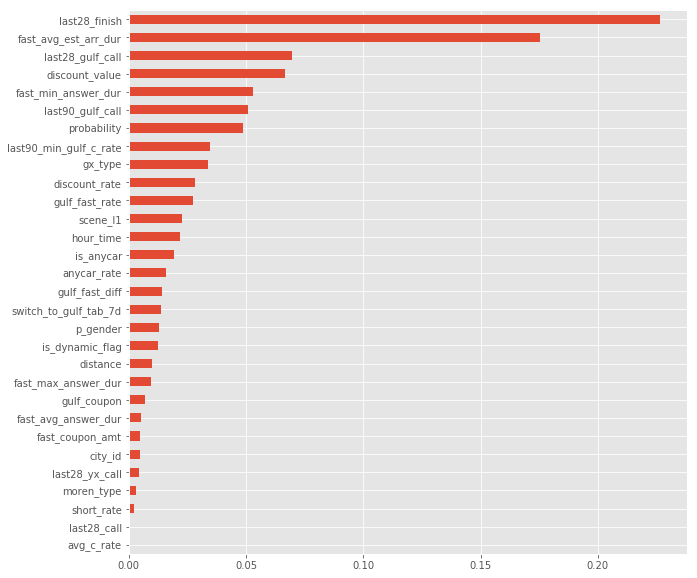

In [16]:
plt.figure(figsize=(10,10))
pd.Series(model.feature_importances_,index=X_train.columns).sort_values()[-30:].plot(kind='barh')

In [ ]:
from pdpbox import pdp,info_plots
feature = 'order_subsidy_sensitive_level'
pdp_goals = pdp.pdp_isolate(model, X_train, list(X_train.columns), feature)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


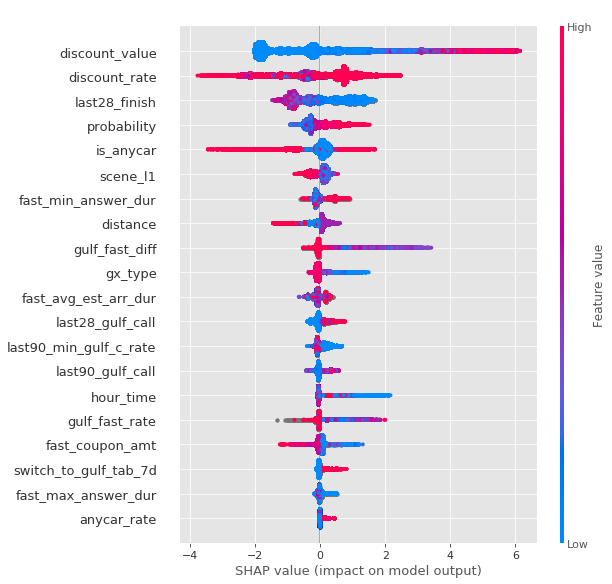

In [17]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train)

In [35]:
X_train.scene_l1.unique()

array([ 1,  0,  4, 10,  9,  5,  8,  6,  7,  3,  2])

In [36]:
le = preprocessing.LabelEncoder()
s = le.fit_transform(df.scene_l1)
le.inverse_transform(X_train.scene_l1.unique())

array(['休闲娱乐', '交通换乘', '商旅', '通勤', '访友探亲', '大型枢纽', '生活服务', '市内商务', '教育',
       '医疗', '其他'], dtype=object)

In [ ]:
j = 30
player_explainer = pd.DataFrame()
player_explainer['feature'] = X_train.columns
player_explainer['feature_value'] = X_train.iloc[j].values
player_explainer['shap_value'] = shap_values[j]
player_explainer

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[9701],X_train.iloc[9701])

In [ ]:
y_train==1

# >=0.9

In [39]:
part1 = pd.read_csv('/Users/didi/Downloads/recall_v31_09.csv',encoding = 'gbk')
                  # skiprows = lambda x: x>0 and np.random.rand() > 0.01)
#part1['label'] = 1
part2 = pd.read_csv('/Users/didi/Downloads/recall_v32_09.csv',encoding = 'gbk')
                  # skiprows = lambda x: x>0 and np.random.rand() > 0.01)
#part2=part2.drop(['rk'],axis=1)
#part2['label'] = 0
part2.columns = part1.columns
df = pd.concat([part1,part2])
df=df.drop(['order_id'],axis=1)
df=df.drop_duplicates()
df['over_charge_dur_rate']=df['over_dur_cnt']/df['last28_finish']
df['over_dis_rate']=df['over_dis_cnt']/df['last28_finish']
df['over_price_rate']=df['over_price_cnt']/df['last28_finish']
#df=df[~(df.discount_value<-1)]
#df=df[df.discount_value.notnull()]

cat = df[['city_id', 'moren_type', 'is_anycar','peak', 'distance', 'scene_l1', 
          'is_commute', 'is_transport', 'is_entertain', 'is_visit', 
          'is_business', 'is_intown_business', 'is_other_scene', 'consume_type', 'p_gender', 
          'age_level', 'order_subsidy_sensitive_level', 'sensitive_level_silent', 'subsidy_sensitive', 'silent_mth']]

no_cat = df[[ 'gulf_fast_rate', 'gulf_fast_diff', 'discount_rate', 'discount_value', 
             #'est_arrive_dur', 
             'is_dynamic_flag', 'hour_time', 'gx_type', 
             #'probability', 
             'has_car_probability', 'is_businessman',
             'switch_from_fast_tab_7d', 'switch_from_gulf_tab_7d', 'switch_to_gulf_tab_7d', 'days_first_finish_gulf',
             'days_since_last_gulf_call', 'total_gulf', 'silent_days', 
             #'last28_call', 'last28_finish', 
             'last28_gulf_call', 'last28_yx_call', 'gaofeng_rate', 'anycar_rate', 'long_rate', 'short_rate',
             'transport_rate', 'entertain_rate', 'commute_rate', 'answer_rate', 'no_answer_cnt', 'gulf_answer_rate',
             'fast_answer_rate', 'avg_c_rate', 'max_c_rate', 'min_c_rate', 'after_cancel_cnt', 'before_cancel_cnt',
             'gulf_cancel_after_rate', 'fast_cancel_after_rate', 'gulf_cancel_before_rate', 'fast_cancel_before_rate',
             'avg_arrive_dur', 'max_arrive_dur', #'min_arrive_dur', 
             'fast_avg_answer_dur', 'fast_max_answer_dur', # 'fast_min_answer_dur', 
             'gulf_avg_answer_dur', 'gulf_max_answer_dur', 'gulf_min_answer_dur', 
             'fast_avg_est_arr_dur', 
             'fast_max_est_arr_dur', #'fast_min_est_arr_dur', 
             'gulf_avg_est_arr_dur', 
             'gulf_max_est_arr_dur', 'gulf_min_est_arr_dur', 'over_price_cnt', 'over_dis_cnt', 'over_dur_cnt', 
             'over_price_rate', 'over_dis_rate', 'over_charge_dur_rate', 'over_arrive_dur_rate', 'min_level',
             'max_level', 'avg_level', 'min_driver_score', 'max_driver_score', 'avg_driver_score', 'cpo_cnt',
             'negative_cnt', 'cpo_rate', 'negative_rate', 'wakes', 'gulf_coupon', 'fast_coupon', 'gulf_coupon_amt', 
             'fast_coupon_amt', 'last90_gulf_call', 'last90_gulf_finish', 'last90_gulf_answer_rate', 
             'last90_avg_gulf_gmv', 'last90_avg_gulf_c_rate', 'last90_max_gulf_c_rate', 'last90_min_gulf_c_rate', 
             'last90_gulf_negative_rate', 'last90_gulf_positive_rate', 'last90_gulf_over_price_rate', 
             'last90_gulf_over_dis_rate', 'last90_gulf_over_charge_dur_rate', 'last90_gulf_over_arrive_dur_rate', 
             'last90_gulf_avg_answer_dur', 'last90_gulf_max_answer_dur', 'last90_gulf_min_answer_dur',
             'last90_gulf_avg_est_arr_dur', 'last90_gulf_max_est_arr_dur', 'last90_gulf_min_est_arr_dur']]

cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

#组合X和Y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)        

model = xgb.XGBClassifier(
        objective='binary:logistic', 
        learning_rate= 0.6,
        silent = 1,
       max_depth =5,
       min_child_weight=1,
       gamma=0,
       subsample=0.9,
       scale_pos_weight=1,
       n_estimators = 10
        ).fit(X_train,y_train)
pred = model.predict(X_test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

0.9352082019814226 0.935170466657872


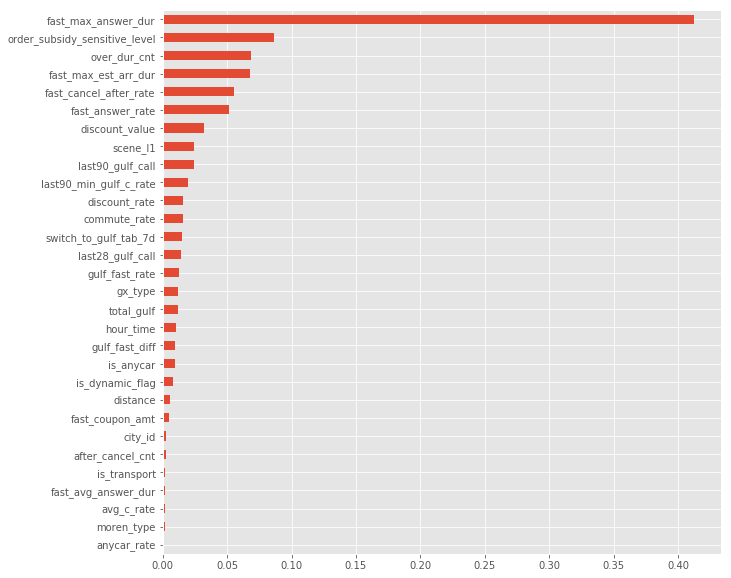

In [40]:
plt.figure(figsize=(10,10))
pd.Series(model.feature_importances_,index=X_train.columns).sort_values()[-30:].plot(kind='barh')

0.1490708297776216

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


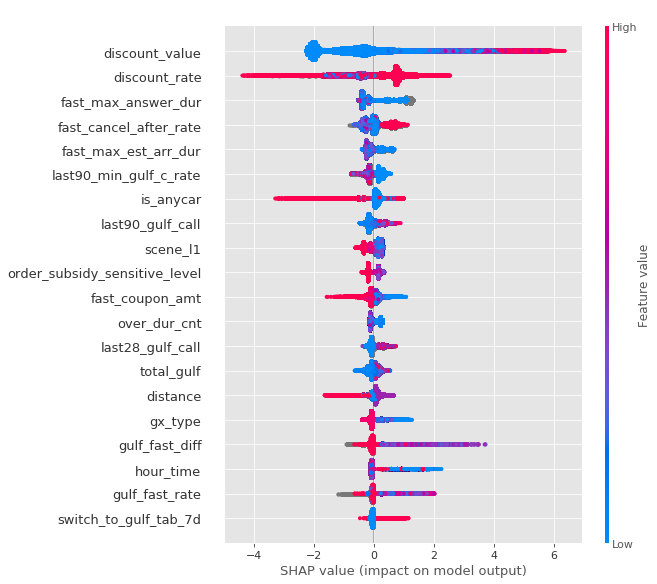

In [41]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train)

In [38]:
X_train[X_train.min_arrive_dur.isnull()].shape[0]

134782

(0, 1000)

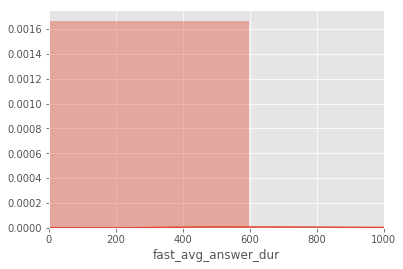

In [71]:
ax=sns.distplot(X_train.fast_avg_answer_dur.dropna())
ax.set_xlim(0,1000)

In [62]:
df[df.fast_max_answer_dur>100].groupby('label').size()

label
0    213715
1     70845
dtype: int64

In [59]:
df[df.fast_max_answer_dur<50].groupby('label').size()

label
0    217992
1    176568
dtype: int64

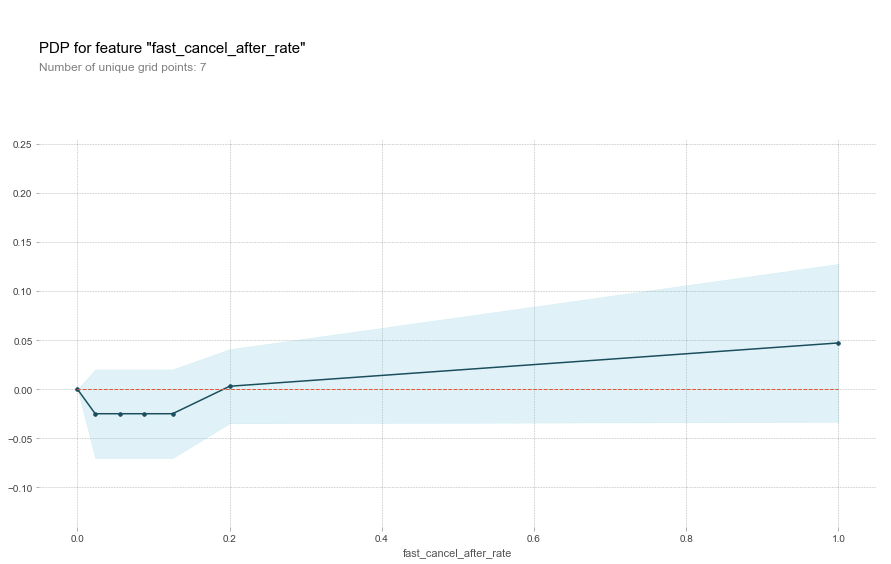

In [64]:
from pdpbox import pdp,info_plots
feature = 'fast_cancel_after_rate'
pdp_goals = pdp.pdp_isolate(model, X_train[X_train.fast_cancel_after_rate.notnull()], list(X_train.columns), feature)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

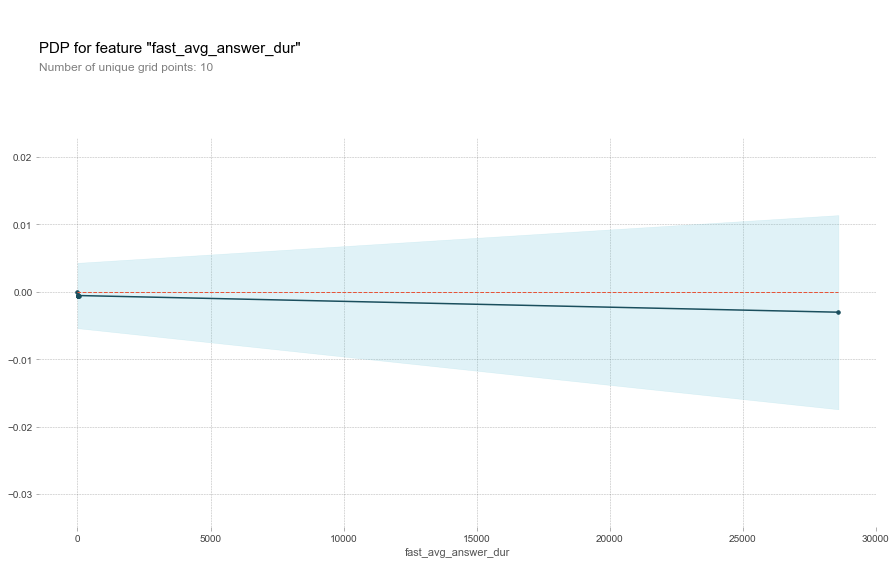

In [65]:
from pdpbox import pdp,info_plots
feature = 'fast_avg_answer_dur'
pdp_goals = pdp.pdp_isolate(model, X_train[X_train.fast_avg_answer_dur.notnull()], list(X_train.columns), feature)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

# 0.7

In [90]:
part1 = pd.read_csv('/Users/didi/Downloads/recall_v31_07.csv',encoding = 'gbk')
                  # skiprows = lambda x: x>0 and np.random.rand() > 0.01)
#part1['label'] = 1
part2 = pd.read_csv('/Users/didi/Downloads/recall_v32_07.csv',encoding = 'gbk')
                  # skiprows = lambda x: x>0 and np.random.rand() > 0.01)
#part2=part2.drop(['rk'],axis=1)
#part2['label'] = 0
part2=part2.sample(240000)
part2.columns = part1.columns
df = pd.concat([part1,part2])
df=df.drop(['order_id'],axis=1)
df=df.drop_duplicates()
df['over_charge_dur_rate']=df['over_dur_cnt']/df['last28_finish']
df['over_dis_rate']=df['over_dis_cnt']/df['last28_finish']
df['over_price_rate']=df['over_price_cnt']/df['last28_finish']
#df=df[~(df.discount_value<-1)]
#df=df[df.discount_value.notnull()]

In [91]:
cat = df[['city_id', 'moren_type', 'is_anycar','peak', 'distance', 'scene_l1', 
          'is_commute', 'is_transport', 'is_entertain', 'is_visit', 
          'is_business', 'is_intown_business', 'is_other_scene', 'consume_type', 'p_gender', 
          'age_level', 'order_subsidy_sensitive_level', 'sensitive_level_silent', 'subsidy_sensitive', 'silent_mth']]

no_cat = df[[ 'gulf_fast_rate', 'gulf_fast_diff', 'discount_rate', 'discount_value', 
             #'est_arrive_dur', 
             'is_dynamic_flag', 'hour_time', 'gx_type', 
             #'probability', 
             'has_car_probability', 'is_businessman',
             'switch_from_fast_tab_7d', 'switch_from_gulf_tab_7d', 'switch_to_gulf_tab_7d', 'days_first_finish_gulf',
             'days_since_last_gulf_call', 'total_gulf', 'silent_days', 
             #'last28_call', 'last28_finish', 
             'last28_gulf_call', 'last28_yx_call', 'gaofeng_rate', 'anycar_rate', 'long_rate', 'short_rate',
             'transport_rate', 'entertain_rate', 'commute_rate', 'answer_rate', 'no_answer_cnt', 'gulf_answer_rate',
             'fast_answer_rate', 'avg_c_rate', 'max_c_rate', 'min_c_rate', 'after_cancel_cnt', 'before_cancel_cnt',
             'gulf_cancel_after_rate', 'fast_cancel_after_rate', 'gulf_cancel_before_rate', 'fast_cancel_before_rate',
             'avg_arrive_dur', 'max_arrive_dur', #'min_arrive_dur', 
             'fast_avg_answer_dur', 'fast_max_answer_dur', # 'fast_min_answer_dur', 
             'gulf_avg_answer_dur', 'gulf_max_answer_dur', 'gulf_min_answer_dur', 
             'fast_avg_est_arr_dur', 
             'fast_max_est_arr_dur', #'fast_min_est_arr_dur', 
             'gulf_avg_est_arr_dur', 
             'gulf_max_est_arr_dur', 'gulf_min_est_arr_dur', 'over_price_cnt', 'over_dis_cnt', 'over_dur_cnt', 
             'over_price_rate', 'over_dis_rate', 'over_charge_dur_rate', #'over_arrive_dur_rate', 
             'min_level','max_level', 'avg_level', 'min_driver_score', 'max_driver_score', 'avg_driver_score', 'cpo_cnt',
             'negative_cnt', 'cpo_rate', 'negative_rate', 'wakes', 'gulf_coupon', 'fast_coupon', 'gulf_coupon_amt', 
             'fast_coupon_amt', 'last90_gulf_call', 'last90_gulf_finish', 'last90_gulf_answer_rate', 
             'last90_avg_gulf_gmv', 'last90_avg_gulf_c_rate', 'last90_max_gulf_c_rate', 'last90_min_gulf_c_rate', 
             'last90_gulf_negative_rate', 'last90_gulf_positive_rate', 'last90_gulf_over_price_rate', 
             'last90_gulf_over_dis_rate', 'last90_gulf_over_charge_dur_rate', 'last90_gulf_over_arrive_dur_rate', 
             'last90_gulf_avg_answer_dur', 'last90_gulf_max_answer_dur', 'last90_gulf_min_answer_dur',
             'last90_gulf_avg_est_arr_dur', 'last90_gulf_max_est_arr_dur', 'last90_gulf_min_est_arr_dur']]

cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

#组合X和Y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)        

model = xgb.XGBClassifier(
        objective='binary:logistic', 
        learning_rate= 0.6,
        silent = 1,
       max_depth =5,
       min_child_weight=1,
       gamma=0,
       subsample=0.9,
       scale_pos_weight=1,
       n_estimators = 10
        ).fit(X_train,y_train)
pred = model.predict(X_test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

0.9329181418760397 0.9325026488797186


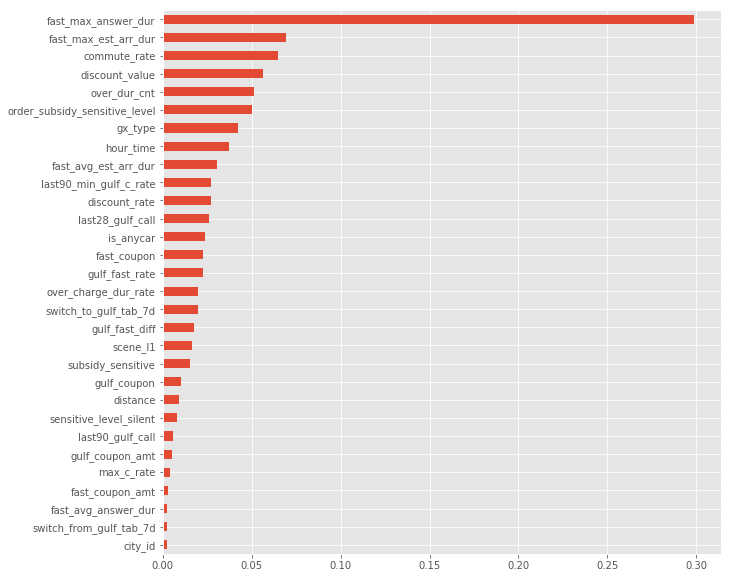

In [92]:
plt.figure(figsize=(10,10))
pd.Series(model.feature_importances_,index=X_train.columns).sort_values()[-30:].plot(kind='barh')

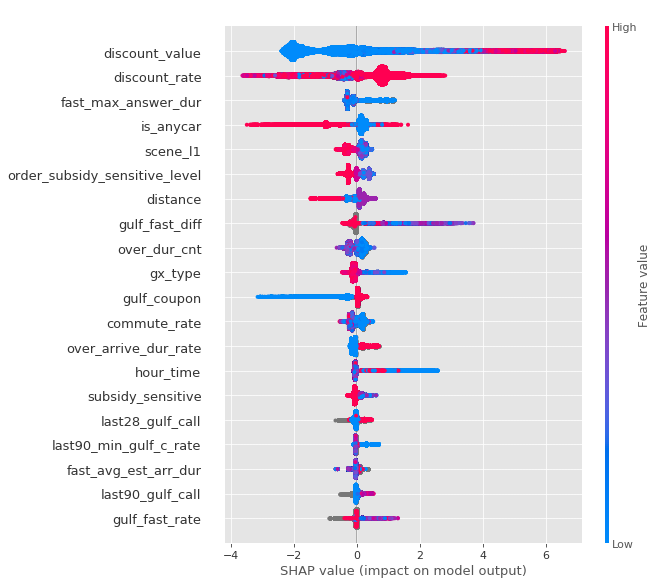

In [69]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train)

In [73]:
X_train[X_train.over_dur_rate.notnull()].shape[0]

292484

In [95]:
df[df.fast_max_answer_dur.isnull()].groupby('label').size()

label
0     8598
1    82153
dtype: int64

In [74]:
X_train.shape[0]

351654

In [79]:
df[df.over_charge_dur_rate==0][['over_charge_dur_rate','over_dur_cnt','last28_finish']].head(3)

,over_charge_dur_rate,over_dur_cnt,last28_finish
0,0.0,0.0,2.0
1,0.0,5.0,15.0
2,0.0,5.0,8.0


In [85]:
df[df.over_dis_rate<1][['over_dis_rate','over_dis_cnt','last28_finish']].head(10)

,over_dis_rate,over_dis_cnt,last28_finish
0,0.0,0.0,2.0
1,0.0,4.0,15.0
2,0.0,3.0,8.0
3,0.0,0.0,6.0
4,0.0,5.0,83.0
6,0.0,2.0,8.0
7,0.0,0.0,2.0
9,0.0,1.0,5.0
10,0.0,0.0,1.0
11,0.0,0.0,1.0


# 0.9 原始分布

In [96]:
df = pd.read_csv('/Users/didi/Downloads/recall_nostop.csv',encoding = 'gbk')
df=df.drop(['order_id','is_td_answer_flag','cancel_type','is_td_finish_flag'],axis=1)
df=df.drop_duplicates()
df['over_charge_dur_rate']=df['over_dur_cnt']/df['last28_finish']
df['over_dis_rate']=df['over_dis_cnt']/df['last28_finish']
df['over_price_rate']=df['over_price_cnt']/df['last28_finish']
df['cpo_rate']=df['cpo_cnt']/df['last28_finish']
df['negative_rate']=df['negative_cnt']/df['last28_finish']
df.shape
#df=df[~(df.discount_value<-1)]

(999728, 130)

In [109]:
cat = df[['city_id', 'moren_type', 'is_anycar','peak', 'distance', 'scene_l1', 
          'is_commute', 'is_transport', 'is_entertain', 'is_visit', 
          'is_business', 'is_intown_business', 'is_other_scene', 'consume_type', 'p_gender', 
          'age_level', 'order_subsidy_sensitive_level', 'sensitive_level_silent', 'subsidy_sensitive', 'silent_mth']]

no_cat = df[[ 'gulf_fast_rate', 'gulf_fast_diff', 'discount_rate', 'discount_value', 
             'est_arrive_dur', 
             'is_dynamic_flag', 'hour_time', 'gx_type', 
             #'probability', 
             'has_car_probability', 'is_businessman',
             'switch_from_fast_tab_7d', 'switch_from_gulf_tab_7d', 'switch_to_gulf_tab_7d', 'days_first_finish_gulf',
             'days_since_last_gulf_call', 'total_gulf', 'silent_days', 
             'last28_call', 'last28_finish', 
             'last28_gulf_call', 'last28_yx_call', 'gaofeng_rate', 'anycar_rate', 'long_rate', 'short_rate',
             'transport_rate', 'entertain_rate', 'commute_rate', 'answer_rate', 'no_answer_cnt', 'gulf_answer_rate',
             'fast_answer_rate', 'avg_c_rate', 'max_c_rate', 'min_c_rate', 'after_cancel_cnt', 'before_cancel_cnt',
             'gulf_cancel_after_rate', 'fast_cancel_after_rate', 'gulf_cancel_before_rate', 'fast_cancel_before_rate',
             'avg_arrive_dur', 'max_arrive_dur', 'min_arrive_dur', 
             'fast_avg_answer_dur', 'fast_max_answer_dur', # 'fast_min_answer_dur', 
             'gulf_avg_answer_dur', 'gulf_max_answer_dur', 'gulf_min_answer_dur', 
             'fast_avg_est_arr_dur', 
             'fast_max_est_arr_dur', 'fast_min_est_arr_dur', 
             'gulf_avg_est_arr_dur', 
             'gulf_max_est_arr_dur', 'gulf_min_est_arr_dur', 'over_price_cnt', 'over_dis_cnt', 'over_dur_cnt', 
             'over_price_rate', 'over_dis_rate', 'over_charge_dur_rate', #'over_arrive_dur_rate', 
             'min_level','max_level', 'avg_level', 'min_driver_score', 'max_driver_score', 'avg_driver_score', 'cpo_cnt',
             'negative_cnt', 'cpo_rate', 'negative_rate', 'wakes', 'gulf_coupon', 'fast_coupon', 'gulf_coupon_amt', 
             'fast_coupon_amt', 'last90_gulf_call', 'last90_gulf_finish', 'last90_gulf_answer_rate', 
             'last90_avg_gulf_gmv', 'last90_avg_gulf_c_rate', 'last90_max_gulf_c_rate', 'last90_min_gulf_c_rate', 
             'last90_gulf_negative_rate', 'last90_gulf_positive_rate', 'last90_gulf_over_price_rate', 
             'last90_gulf_over_dis_rate', 'last90_gulf_over_charge_dur_rate', 'last90_gulf_over_arrive_dur_rate', 
             'last90_gulf_avg_answer_dur', 'last90_gulf_max_answer_dur', 'last90_gulf_min_answer_dur',
             'last90_gulf_avg_est_arr_dur', 'last90_gulf_max_est_arr_dur', 'last90_gulf_min_est_arr_dur']]

cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

#组合X和Y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)        

model = xgb.XGBClassifier(
        objective='binary:logistic', 
        learning_rate= 0.6,
        silent = 1,
       max_depth =5,
       min_child_weight=1,
       gamma=0,
       subsample=0.9,
       scale_pos_weight=1,
       n_estimators = 10
        ).fit(X_train,y_train)
pred = model.predict(X_test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

0.9820191091977017 0.8646445042453434


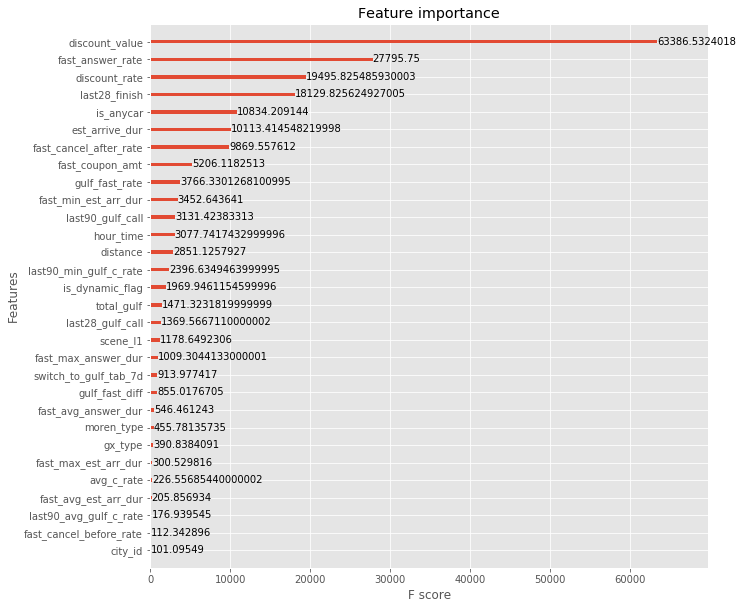

In [144]:
from xgboost import plot_importance
#plt.figure(figsize=(10,10))
#fig,ax = plt.subplots(figsize=(5,12))
#pd.Series(model.feature_importances_,index=X_train.columns).sort_values()[-30:].plot(kind='barh')
ax=plot_importance(model,importance_type = 'total_gain',max_num_features = 30)
fig = ax.figure
fig.set_size_inches(10, 10)
plt.show()

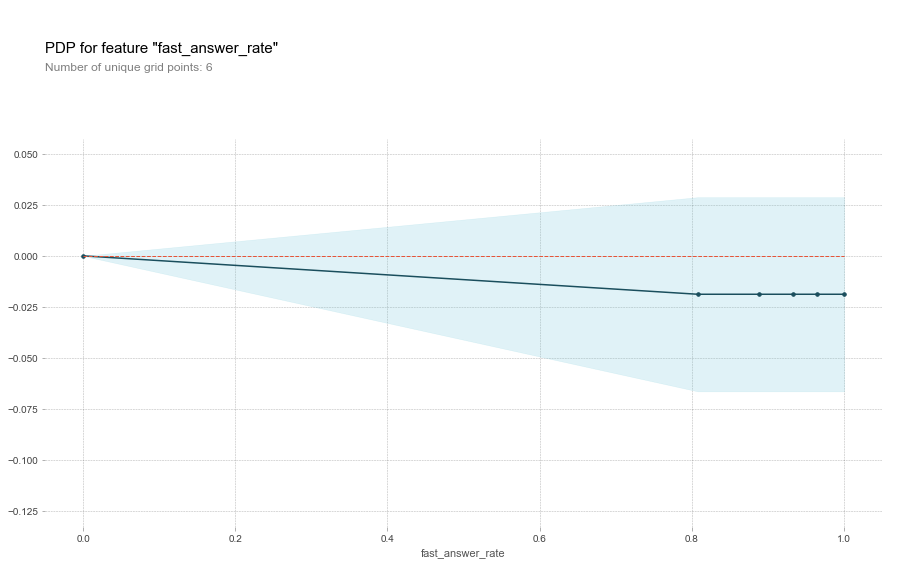

In [136]:
from pdpbox import pdp,info_plots
feature = 'fast_answer_rate'
pdp_goals = pdp.pdp_isolate(model, X_train[X_train.fast_answer_rate.notnull()], list(X_train.columns), feature,
                           num_grid_points=10)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

In [154]:
df[df.last28_finish.isnull()].shape[0]/df.shape[0]

0.027835571275386904

In [153]:
len(df[(df.last28_finish.isnull())&(df.label==1)].passenger_id.unique())/
len(df[df.last28_finish.isnull()].passenger_id.unique())

0.5300394679140477

In [150]:
len(df[df.label==1].passenger_id.unique())/len(df.passenger_id.unique())

0.07049558694388276

In [148]:
len(df[(df.fast_answer_rate<0.8)&(df.label==1)].passenger_id.unique())/len(df[df.fast_answer_rate<0.8].passenger_id.unique())

0.05733850129198966

In [152]:
len(df[(df.fast_answer_rate.isnull())&(df.label==1)].passenger_id.unique())/len(df[df.fast_answer_rate.isnull()].passenger_id.unique())

0.516541047975809

In [155]:
len(df.passenger_id.unique())

741323

In [160]:
df.shape[0]

999728

In [149]:
len(df[(df.fast_answer_rate>0.8)&(df.label==1)].passenger_id.unique())/len(df[df.fast_answer_rate>0.8].passenger_id.unique())

0.03937500401999061

In [143]:
df[df.discount_value>0].shape

(320558, 130)

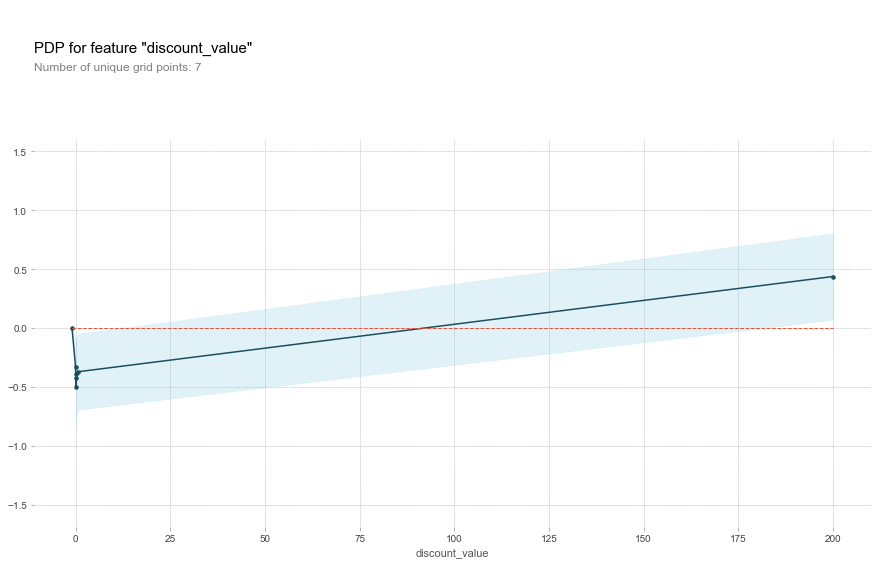

In [137]:
feature = 'discount_value'
pdp_goals = pdp.pdp_isolate(model, X_train[X_train.discount_value.notnull()], list(X_train.columns), feature,
                           num_grid_points=10)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

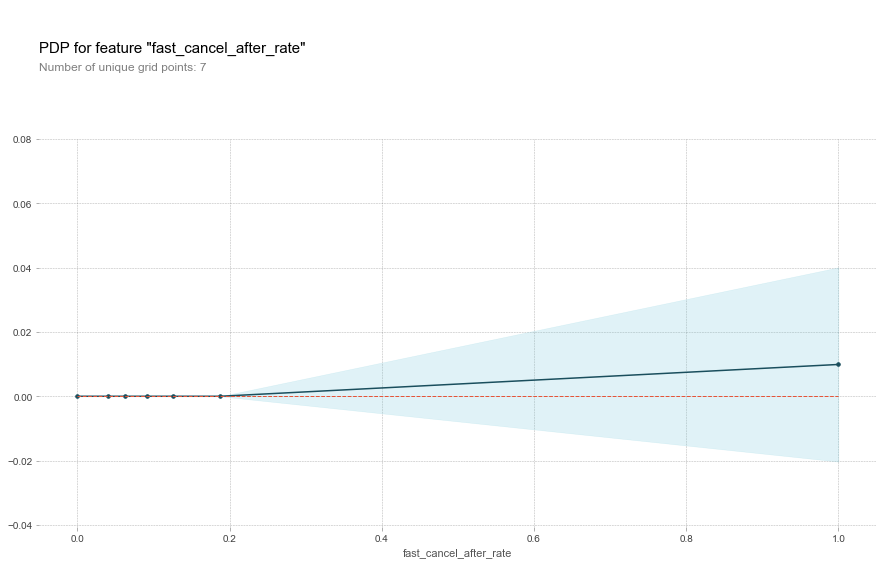

In [138]:
feature = 'fast_cancel_after_rate'
pdp_goals = pdp.pdp_isolate(model, X_train[X_train.fast_cancel_after_rate.notnull()], list(X_train.columns), feature,
                           num_grid_points=10)
pdp.pdp_plot(pdp_goals, feature)
plt.show()

In [117]:
df[df.fast_answer_rate<0.8].groupby('label').size()

label
0    88409
1     4532
dtype: int64

In [118]:
df.groupby('label').size()

label
0    946291
1     53437
dtype: int64

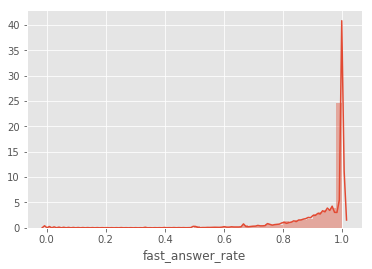

In [116]:
ax=sns.distplot(df[df.label==0].fast_answer_rate.dropna())

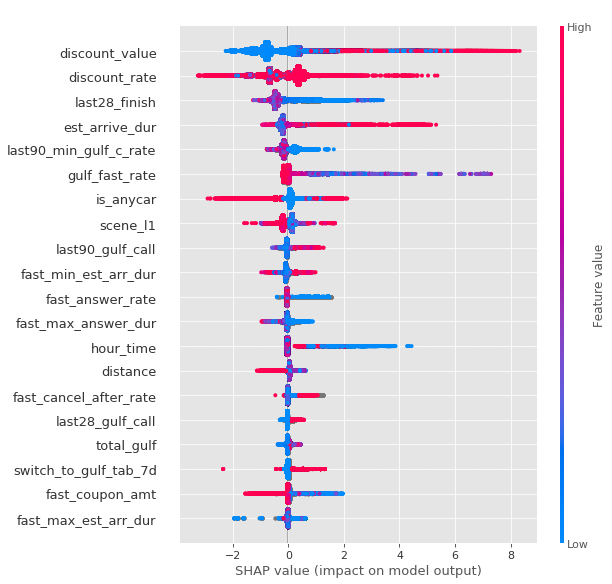

In [115]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train)

# 0.7 正常分布

In [161]:
df = pd.read_csv('/Users/didi/Downloads/recall_nostop07.csv',encoding = 'gbk')
df=df.drop(['order_id'],axis=1)
df=df.drop_duplicates()
df['over_charge_dur_rate']=df['over_dur_cnt']/df['last28_finish']
df['over_dis_rate']=df['over_dis_cnt']/df['last28_finish']
df['over_price_rate']=df['over_price_cnt']/df['last28_finish']
df['cpo_rate']=df['cpo_cnt']/df['last28_finish']
df['negative_rate']=df['negative_cnt']/df['last28_finish']
df.shape

(999153, 130)

In [164]:
cat = df[['city_id', 'moren_type', 'is_anycar','peak', 'distance', 'scene_l1', 
          'is_commute', 'is_transport', 'is_entertain', 'is_visit', 
          'is_business', 'is_intown_business', 'is_other_scene', 'consume_type', 'p_gender', 
          'age_level', 'order_subsidy_sensitive_level', 'sensitive_level_silent', 'subsidy_sensitive', 'silent_mth']]

no_cat = df[[ 'gulf_fast_rate', 'gulf_fast_diff', #'discount_rate', 'discount_value', 
             'est_arrive_dur', 
             'is_dynamic_flag', 'hour_time', 'gx_type', 
             #'probability', 
             'has_car_probability', 'is_businessman',
             'switch_from_fast_tab_7d', 'switch_from_gulf_tab_7d', 'switch_to_gulf_tab_7d', 'days_first_finish_gulf',
             'days_since_last_gulf_call', 'total_gulf', 'silent_days', 
             'last28_call', 'last28_finish', 
             'last28_gulf_call', 'last28_yx_call', 'gaofeng_rate', 'anycar_rate', 'long_rate', 'short_rate',
             'transport_rate', 'entertain_rate', 'commute_rate', 'answer_rate', 'no_answer_cnt', 'gulf_answer_rate',
             'fast_answer_rate', 'avg_c_rate', 'max_c_rate', 'min_c_rate', 'after_cancel_cnt', 'before_cancel_cnt',
             'gulf_cancel_after_rate', 'fast_cancel_after_rate', 'gulf_cancel_before_rate', 'fast_cancel_before_rate',
             'avg_arrive_dur', 'max_arrive_dur', 'min_arrive_dur', 
             'fast_avg_answer_dur', 'fast_max_answer_dur', # 'fast_min_answer_dur', 
             'gulf_avg_answer_dur', 'gulf_max_answer_dur', 'gulf_min_answer_dur', 
             'fast_avg_est_arr_dur', 
             'fast_max_est_arr_dur', 'fast_min_est_arr_dur', 
             'gulf_avg_est_arr_dur', 
             'gulf_max_est_arr_dur', 'gulf_min_est_arr_dur', 'over_price_cnt', 'over_dis_cnt', 'over_dur_cnt', 
             'over_price_rate', 'over_dis_rate', 'over_charge_dur_rate', #'over_arrive_dur_rate', 
             'min_level','max_level', 'avg_level', 'min_driver_score', 'max_driver_score', 'avg_driver_score', 'cpo_cnt',
             'negative_cnt', 'cpo_rate', 'negative_rate', 'wakes', 'gulf_coupon', 'fast_coupon', 'gulf_coupon_amt', 
             'fast_coupon_amt', 'last90_gulf_call', 'last90_gulf_finish', 'last90_gulf_answer_rate', 
             'last90_avg_gulf_gmv', 'last90_avg_gulf_c_rate', 'last90_max_gulf_c_rate', 'last90_min_gulf_c_rate', 
             'last90_gulf_negative_rate', 'last90_gulf_positive_rate', 'last90_gulf_over_price_rate', 
             'last90_gulf_over_dis_rate', 'last90_gulf_over_charge_dur_rate', 'last90_gulf_over_arrive_dur_rate', 
             'last90_gulf_avg_answer_dur', 'last90_gulf_max_answer_dur', 'last90_gulf_min_answer_dur',
             'last90_gulf_avg_est_arr_dur', 'last90_gulf_max_est_arr_dur', 'last90_gulf_min_est_arr_dur']]

cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

#组合X和Y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)        

model = xgb.XGBClassifier(
        objective='binary:logistic', 
        learning_rate= 0.6,
        silent = 1,
       max_depth =5,
       min_child_weight=1,
       gamma=0,
       subsample=0.9,
       scale_pos_weight=1,
       n_estimators = 10
        ).fit(X_train,y_train)
pred = model.predict(X_test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

0.9819487647574553 0.6407767988689709


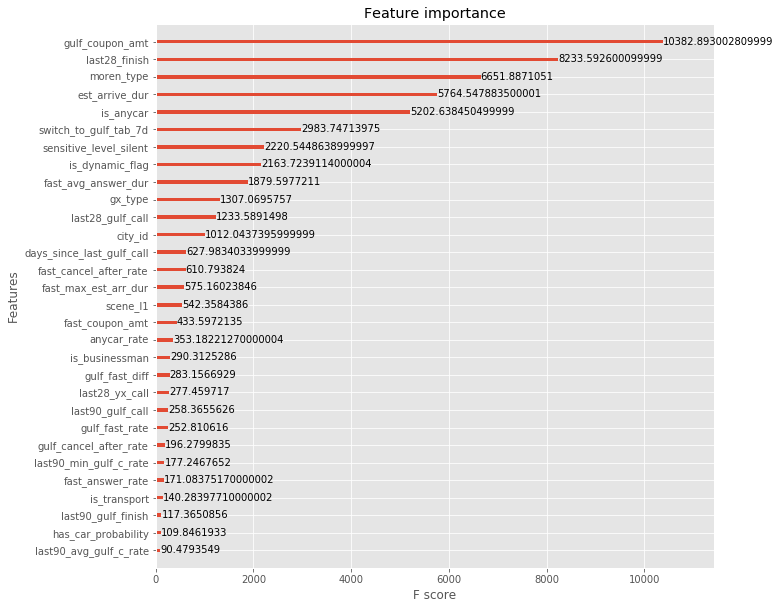

In [168]:
from xgboost import plot_importance
#plt.figure(figsize=(10,10))
#fig,ax = plt.subplots(figsize=(5,12))
#pd.Series(model.feature_importances_,index=X_train.columns).sort_values()[-30:].plot(kind='barh')
ax=plot_importance(model,importance_type = 'total_gain',max_num_features = 30)
fig = ax.figure
fig.set_size_inches(10, 10)
plt.show()

In [167]:
df.groupby(['label','moren_type']).size()

label  moren_type
0      0             280698
       1             695794
1      0              15363
       1               7298
dtype: int64

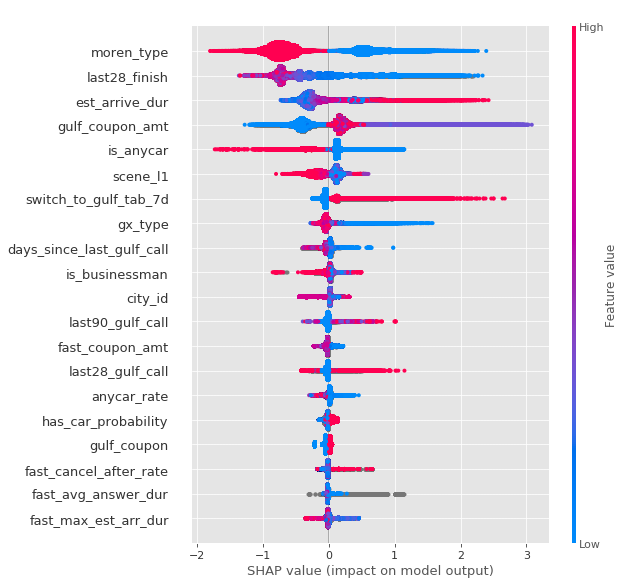

In [166]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values,X_train)

# PSM

In [ ]:
X_field=['call_orders','make_orders','subsidy_ratio','avg_gmv','city_level','pay_type','stage']
Y_field=['confirm_flag']
field=X_field+Y_field

data=df
data=data.dropna()
treated=data[(data['label']==1)]
control=data[(data['label']==0)]
treated_sample=treated.sample(10000,axis=0).reset_index(drop=True)
control_sample=control.sample(100000,axis=0).reset_index(drop=True)
data_p = control_sample.append(treated_sample).reset_index(drop=True)

y_f,x_f=patsy.dmatrices('{} ~ {}'.format(Y_field[0], '+'.join(X_field)), data=data_p,
                                         return_type='dataframe')
formula = '{} ~ {}'.format(Y_field[0], '+'.join(X_field))
print('Formula:\n'+formula)
print('n majority:', len(control_sample))
print('n minority:', len(treated_sample))

In [ ]:
i=0
nmodels=5
errors=0
model_accuracy = []
models = []
while i < nmodels and errors < 5:
    sys.stdout.write('\r{}: {}\{}'.format("Fitting Models on Balanced Samples", i, nmodels)) #第几个模型

    # sample from majority to create balance dataset
    df = control_sample.sample(len(treated_sample)).append(treated_sample).dropna()  #模型选择相同的对照组和控制组样本

    y_samp, X_samp = patsy.dmatrices(formula, data=df, return_type='dataframe')   #选出模型的自变量和因变量   

    glm = GLM(y_samp, X_samp, family=sm.families.Binomial())  #逻辑回归模型    

    try:
        res = glm.fit()
        preds = [1.0 if i >= .5 else 0.0 for i in res.predict(X_samp)]
        preds=pd.DataFrame(preds)
        preds.columns=y_samp.columns
        b=y_samp.reset_index(drop=True) 
        a=preds.reset_index(drop=True) 
        ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_samp)).values[0]
#         print('   model_accuracy:{}'.format(ab_score))
        model_accuracy.append(ab_score)
        models.append(res)
        i += 1

    except Exception as e:
        errors += 1 # to avoid infinite loop for misspecified matrix
        print('Error: {}'.format(e))

print("\nAverage Accuracy:", "{}%".
      format(round(np.mean(model_accuracy) * 100, 2)))


In [ ]:
print('Fitting 1 (Unbalanced) Model...')
glm = GLM(y_f, x_f, family=sm.families.Binomial())
res = glm.fit()
# model_accuracy.append(self._scores_to_accuracy(res, x_f, y_f))
preds = [1.0 if i >= .5 else 0.0 for i in res.predict(x_f)]
preds=pd.DataFrame(preds)
preds.columns=y_f.columns
b=y_f.reset_index(drop=True) 
a=preds.reset_index(drop=True) 
ab_score=((a.sort_index().sort_index(axis=1) == b.sort_index().sort_index(axis=1)).sum() * 1.0 / len(y_f)).values[0]
model_accuracy.append(ab_score)
models.append(res)

print("\nAccuracy", round(np.mean(model_accuracy[0]) * 100, 2))

In [ ]:
scores = np.zeros(len(x_f))
for i in range(nmodels):
    m = models[i]
    scores += m.predict(x_f)
data_p['scores'] = scores/nmodels

In [ ]:
threshold=0.001
method='min'
nmatches=1
test_scores = data_p[data_p[Y_field[0]]==True][['scores']]
ctrl_scores = data_p[data_p[Y_field[0]]==False][['scores']]
result, match_ids = [], []
for i in range(len(test_scores)):
    # uf.progress(i+1, len(test_scores), 'Matching Control to Test...')
    match_id = i
    score = test_scores.iloc[i]
    if method == 'random':
        bool_match = abs(ctrl_scores - score) <= threshold
        matches = ctrl_scores.loc[bool_match[bool_match.scores].index]
    elif method == 'min':
        matches = abs(ctrl_scores - score).sort_values('scores').head(nmatches)
    else:
        raise(AssertionError, "Invalid method parameter, use ('random', 'min')")
    if len(matches) == 0:
        continue
    # randomly choose nmatches indices, if len(matches) > nmatches
    select = nmatches if method != 'random' else np.random.choice(range(1, max_rand+1), 1)
    chosen = np.random.choice(matches.index, min(select, nmatches), replace=False)
#     print(chosen)
    result.extend([test_scores.index[i]] + list(chosen))
    match_ids.extend([i] * (len(chosen)+1))
    ctrl_scores=ctrl_scores.drop(chosen,axis=0)
matched_data =data_p.loc[result]
matched_data['match_id'] = match_ids
matched_data['record_id'] = matched_data.index


In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(matched_data[matched_data[Y_field[0]]==0].scores, label='Control')
sns.distplot(matched_data[matched_data[Y_field[0]]==1].scores, label='Test')
plt.legend(loc='upper right')
plt.xlim((0, 1))
plt.title("Propensity Scores Before Matching")
plt.ylabel("Percentage (%)")
plt.xlabel("Scores")